In [1]:
#import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit


In [2]:
dataset_csv = 'letter_csvs\\_final_.csv'
dataset_total_rows = 6104
dataset_total_columns = 42    #without the first coloumn (class id coloumn) 




X_dataset = np.loadtxt(dataset_csv, delimiter=',',dtype='float32', usecols=list(range(1, dataset_total_columns+1)))
Y_dataset = np.loadtxt(dataset_csv,delimiter=',',dtype='int32',usecols=(0))

X_train, X_test, Y_train, Y_test = train_test_split(X_dataset,Y_dataset,train_size=0.8, shuffle=True)

'''
 since we do not wont our series of frames to be splited
 , we need to define a time window were data will be stick together,
 during the 80/20 dataset split
'''


# time_window = 1
# training_num = int(dataset_total_rows * (1./float(time_window)) * 0.8)
# testing_num = int(dataset_total_rows * (1./float(time_window)) * 0.2)

# print(training_num,testing_num)

# X_train = X_train.reshape(4883,time_window,dataset_total_columns)
# X_test = X_test.reshape(1221, time_window,dataset_total_columns)
# Y_train = Y_train.reshape(4883,time_window,1)
# Y_test = Y_test.reshape(1221,time_window,1)

# print(X_train.shape[1:])
 

<ipython-input-2-06ec6f193feb>:9: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  Y_dataset = np.loadtxt(dataset_csv,delimiter=',',dtype='int32',usecols=(0))


'\n since we do not wont our series of frames to be splited\n , we need to define a time window were data will be stick together,\n during the 80/20 dataset split\n'

In [6]:
model = Sequential()




# model.add(LSTM((256), input_shape = (X_train.shape[1:]), activation='relu', return_sequences=True))
# model.add(Dropout(0.2))

model.add(Dense((100), input_shape = (42,),activation='relu'))
model.add(Dropout(0.2))

model.add(Dense((100), activation='relu'))
model.add(Dropout(0.2))          

model.add(Dense((50), activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(27, activation='softmax'))






model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'], run_eagerly=True )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4300      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 27)               

In [7]:
history = model.fit(X_train,Y_train, epochs=20, validation_data=(X_test,Y_test))

Epoch 1/20
153/153 [==============================] - 9s 54ms/step - loss: 2.7270 - accuracy: 0.2210 - val_loss: 1.6420 - val_accuracy: 0.5340
Epoch 2/20
153/153 [==============================] - 11s 71ms/step - loss: 1.4346 - accuracy: 0.5204 - val_loss: 0.7313 - val_accuracy: 0.8673
Epoch 3/20
153/153 [==============================] - 10s 66ms/step - loss: 0.9083 - accuracy: 0.6826 - val_loss: 0.4584 - val_accuracy: 0.9124
Epoch 4/20
153/153 [==============================] - 9s 60ms/step - loss: 0.6631 - accuracy: 0.7702 - val_loss: 0.3361 - val_accuracy: 0.9361
Epoch 5/20
153/153 [==============================] - 10s 65ms/step - loss: 0.5362 - accuracy: 0.8249 - val_loss: 0.2579 - val_accuracy: 0.9435
Epoch 6/20
153/153 [==============================] - 10s 66ms/step - loss: 0.4453 - accuracy: 0.8474 - val_loss: 0.2072 - val_accuracy: 0.9541
Epoch 7/20
153/153 [==============================] - 9s 59ms/step - loss: 0.3825 - accuracy: 0.8753 - val_loss: 0.1744 - val_accuracy: 0.

In [6]:
model_save_path = 'model\\model_02_40'
model.save(model_save_path+'.h5')

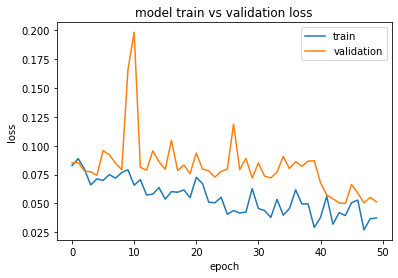

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig(model_save_path+'_loss_graph.png')
plt.show()

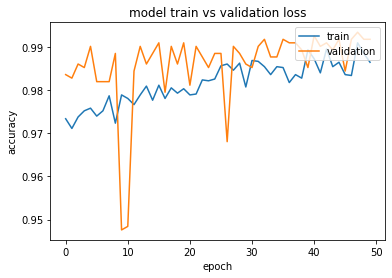

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig(model_save_path+'_accuracy_graph.png')
plt.show()

2/2 [==============================] - 1s 7ms/step
26
x_0 0.028770617952613976
0
x_1 0.005006059701052834
0
x_0 0.05110462633892894
0
x_0 0.0049168583574100925
21
x_0 0.0006779559640563093
10
x_0 0.000390510555007495
7
x_0 0.00564164748066105
19
x_0 0.0008631739532575012
3
x_0 0.021777930902317166
16
x_0 0.0509559877216816
4
x_0 0.0009535522549413145
0
x_0 0.03162083066999912
26
x_1 2.7990912002451296e-05
10
x_0 0.047488489989507346
15
x_0 0.028354247286915782
0
x_0 0.05005341643700376
0
x_0 0.005384291257360019
18
x_0 2.3960950056789446e-05
(18,)
(18,)


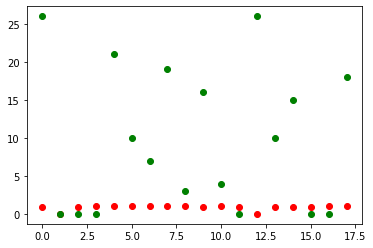

In [59]:
results = model.predict(X_test)

x = []
y = []
for i in range(18):
    y.append(Y_test[i][0][0])
    print(Y_test[i][0][0])
    x_0 = 0
    x_1 = 0
    for j in range(2):
        x_0 += results[i][j][0]
        x_1 += results[i][j][1]
    x_0 *= 0.05
    x_1 *= 0.05
    if x_0 > x_1:
        print("x_0", x_0)
        x.append(1.-x_0)
    else:
        print("x_1", x_1)
        x.append(x_1)
# results = results[:,:18]
# y_test = y_test[:,:18]
# print(results.shape)
# print(y_test.shape)
# plt.scatter(range(18), results, c='r')
# plt.scatter(range(18), y_test, c='g')
# plt.show()

# test2 = y_test[0:18][0][0]
y = np.array(y)
x = np.array(x)
print(y.shape)
print(x.shape)
plt.scatter(range(18), x, c='r')
plt.scatter(range(18), y, c='g')
plt.show()